# Multivariate Data Sets
---

Multivariate analysis is the branch of statistics that generalizes methods of inferential statistics, so that a population $X$ can be characterized through a finite collection of random variables $X_i$. i.e multivariated distribution of random vectors. E.j. a species of animals can be characterized through quantitative and qualitative variables as they are high body, body width, weight, head high, head width, leg size, hair color, eye color, sex, etc. this variables are called explicatives.

$$ \vec{X} = (X_1,X_2,...,X_p) $$

As in classical inferential statistics, multivariate analysis the main idea is to generalize patterns or obtain useful conclusions from a multivariate population based on the information of the sample however in this case the information is multidimensional.

#### Statistical learning and machine learning

There are often situations in which it is necessary to make inferences about the future behavior of one or several variables in terms of random vectors, infer the population type of a random vector since there are several populations that share the same explicative variables but with different distribution, or find boundaries and structures of clustering since there are different types of mixed populations of which the membership of the vectors is not known. 

For these situations and some more, exist results based on multivariate analysis that provides methods for a non-exactly teoric solution to the problem, this is called **statistical learning**. In addition to this, a computational approach is added considering algorithms, complexity, expenditure, data structures, etc. then the set of these techniques known as **machine learning**.


#### Data matrix

Supose that you have n obervations of the random vector $\vec{X}$ (the distribution of the population), such that each vector have p explicative variables. Then set of observations $\{\vec{X}_i\}_{i=0}^n=\{(X_1,...,X_p)_i\}_{i=0}^n$ can be represented as a matrix called data matrix $\textbf{X}_{n \times p}$, the rows of this matrix represent de index of the observation and each column represent one of the explicative variables.

$$\textbf{X}_{n \times p}=
\left( \begin{array}{ccccc}
x_{1 1} & \cdots & x_{1 j} & \cdots & x_{1 p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
x_{i 1} & \cdots & x_{i j} & \cdots & x_{i p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
x_{n 1} & \cdots & x_{n j} & \cdots & x_{n p} \end{array} \right)
$$

**Notation:**
* $\textbf{x}_i$ Indicates the i-th row of $\textbf{X}$, however it will operated as a column.
* $X_j$ Indicates the j-th column of $\textbf{X}$

**Example 1.1 - 1 [Iris plants]**: The following datset contains samples of 3 iris plants populations of 50, obervations each one. The 3 populations share the same explicative variables:
1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm
5. Species: 
      - Iris Setosa
      - Iris Versicolour
      - Iris Virginica

URL of the dataset.
https://archive.ics.uci.edu/ml/datasets/iris

In [3]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import Column as C

try:
    sc = SparkContext('local[*]')
except:
    sc = SparkContext.getOrCreate('local[*]')
sqlContext = SQLContext(sc)

In [4]:
irisPath = '../DataSets/Iris.csv'
lim = 4
irisDF = sqlContext.read.format('com.databricks.spark.csv')\
                   .options(header='true',inferschema='true')\
                   .load(irisPath)
irisSetosaDF = irisDF.where(irisDF.Species == 'Iris-setosa')
irisVersicolorDF = irisDF.where(irisDF.Species == 'Iris-versicolor')
irisVirginicaDF = irisDF.where(irisDF.Species == 'Iris-virginica')
irisSetosaDF.limit(lim).union(irisVersicolorDF.limit(lim)).union(irisVirginicaDF.limit(lim)).toPandas()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,7.0,3.2,4.7,1.4,Iris-versicolor
5,6.4,3.2,4.5,1.5,Iris-versicolor
6,6.9,3.1,4.9,1.5,Iris-versicolor
7,5.5,2.3,4.0,1.3,Iris-versicolor
8,6.3,3.3,6.0,2.5,Iris-virginica
9,5.8,2.7,5.1,1.9,Iris-virginica


#### Visualizing some columns subsets 

In [62]:
import matplotlib.pyplot as plt
import numpy as np

def maginalHistograms(x,y,plt):
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]
    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)
    axScatter.scatter(x, y)
    binwidth = 0.25
    xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
    lim = (int(xymax/binwidth) + 1) * binwidth
    bins = np.arange(-lim, lim + binwidth, binwidth)
    axHistx.hist(x, bins=bins)
    axHisty.hist(y, bins=bins, orientation='horizontal')
    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())
    return plt

def plotVars(x,y,setosaDF,versicolorDF,virginicaDF):
    plt.style.use('ggplot')
    plt.figure(figsize=(20,12))
    axes = [x,y]
    maginalHistograms(setosaDF.toPandas()[x],setosaDF.toPandas()[y],plt)
    maginalHistograms(versicolorDF.toPandas()[x],versicolorDF.toPandas()[y],plt)
    maginalHistograms(virginicaDF.toPandas()[x],virginicaDF.toPandas()[y],plt)
    plt.show()

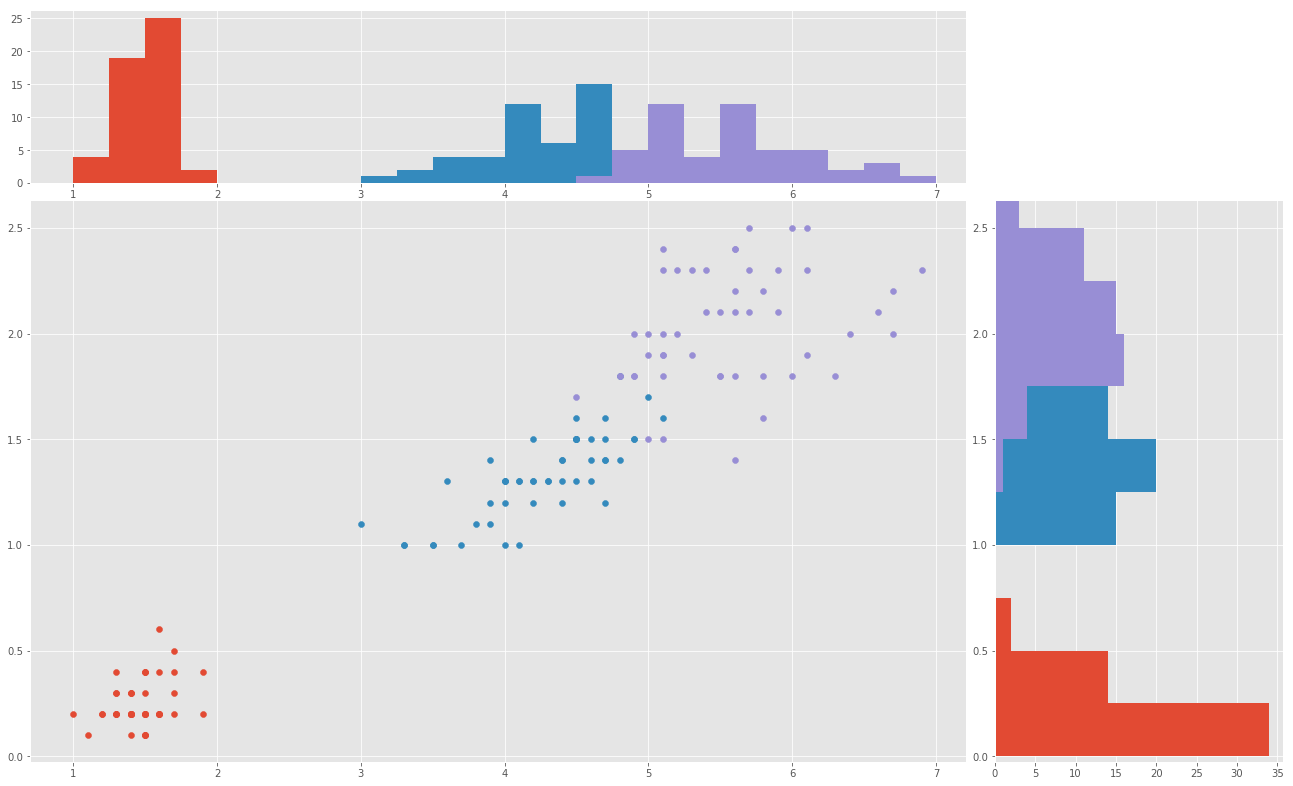

In [63]:
plotVars('PetalLengthCm','PetalWidthCm',irisSetosaDF,irisVersicolorDF,irisVirginicaDF)